# NN Reachablity Demo

## Imports

In [7]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# TODO get interactive plotting working in jupyterlab
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy

from interval import interval, inf, imath

from safe_train import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Demo

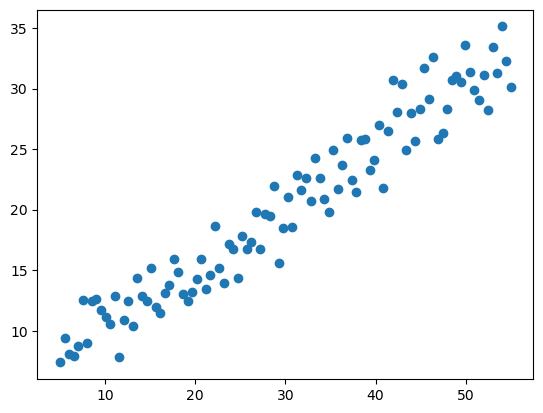

In [10]:
x, y = generate_data(n=100)
plt.figure()
plt.scatter(x, y)
plt.show()

2023-04-06 14:26:32.346397: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-06 14:26:32.358530: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-06 14:26:32.657661: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-06 14:26:32.815687: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


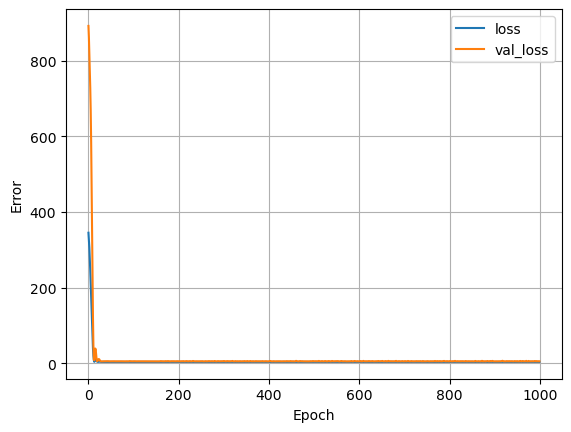

In [11]:
model, history = train_single_node_nn(x, y)
plot_loss(history)

1/1 [==============================] - 0s 42ms/step


2023-04-03 10:52:25.660576: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


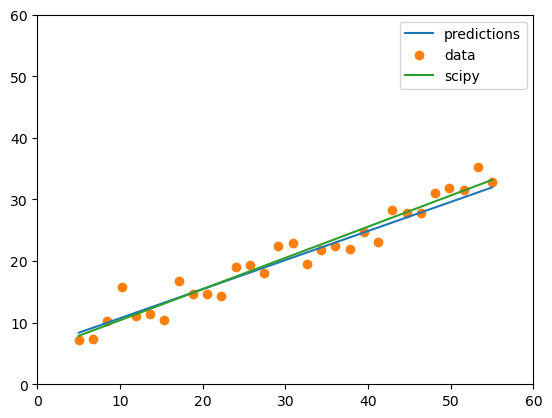

In [4]:
plot_predictions(model, x, y, [0, 60], [0, 60])

In [5]:
# neural network values
y_predict = model.predict(x)
# scipy values
popt, _ = scipy.optimize.curve_fit(lambda x, b0, b1: b0 + b1 * x, x, y)
y_scipy = x * popt[1] + popt[0]

1/1 [==============================] - 0s 10ms/step


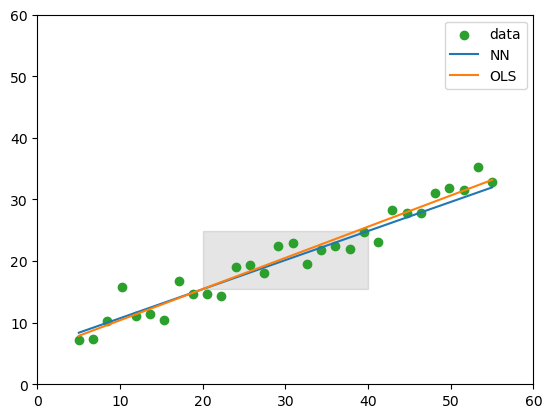

In [6]:
input_interval = interval[20, 40]
output_interval = propagate_interval(input_interval, model)
plot_intervals(input_interval, output_interval, x, y, y_predict, y_scipy)